In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

pd.set_option('display.max_rows', 200)

In [2]:
from google.colab import files
uploaded = files.upload()

# Get the uploaded filename
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

print("\nColumn names:")
print(df.columns.tolist())


Saving data.csv to data.csv
Dataset shape: (2017, 17)

First few rows:
   Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0           0        0.0102         0.833       204600   0.434   
1           1        0.1990         0.743       326933   0.359   
2           2        0.0344         0.838       185707   0.412   
3           3        0.6040         0.494       199413   0.338   
4           4        0.1800         0.678       392893   0.561   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0          0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1          0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2          0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3          0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4          0.512000    5    0.4390   -11.648     0       0.0694  174.004   

   time_signature  valence  target      song_title            artist  
0   

In [3]:
# Select features for clustering

# These are audio features that represent mood/energy of songs
features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness',
            'valence', 'tempo']

# Extract only the feature columns
X = df[features]

print("\nFeatures for clustering:")
print(X.head())

# Check for missing values
print("\nMissing values:", X.isnull().sum().sum())


Features for clustering:
   danceability  energy  loudness  speechiness  acousticness  \
0         0.833   0.434    -8.795       0.4310        0.0102   
1         0.743   0.359   -10.401       0.0794        0.1990   
2         0.838   0.412    -7.148       0.2890        0.0344   
3         0.494   0.338   -15.236       0.0261        0.6040   
4         0.678   0.561   -11.648       0.0694        0.1800   

   instrumentalness  liveness  valence    tempo  
0          0.021900    0.1650    0.286  150.062  
1          0.006110    0.1370    0.588  160.083  
2          0.000234    0.1590    0.173   75.044  
3          0.510000    0.0922    0.230   86.468  
4          0.512000    0.4390    0.904  174.004  

Missing values: 0


In [4]:
# Standardize the features

# This is important because features have different scales
# (e.g., tempo ranges 0-200, but danceability is 0-1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nData after scaling (first 5 rows):")
print(X_scaled[:5])


Data after scaling (first 5 rows):
[[ 1.33287384 -1.17770008 -0.45453036  3.76308393 -0.68246675 -0.40786448
  -0.16629082 -0.8530387   1.06670945]
 [ 0.77382959 -1.53446769 -0.88157265 -0.14752949  0.04389718 -0.4656833
  -0.34645405  0.36896951  1.4423234 ]
 [ 1.36393186 -1.28235191 -0.01658599  2.18371218 -0.5893629  -0.48719967
  -0.20489723 -1.31028018 -1.74516635]
 [-0.77285951 -1.63436262 -2.16721989 -0.74035001  1.60204014  1.37942922
  -0.63471521 -1.07963625 -1.3169642 ]
 [ 0.37007541 -0.57357359 -1.2131553  -0.25875285 -0.02920089  1.38675269
   1.59673502  1.6476271   1.96411981]]


In [5]:
# Apply K-Means clustering

# Let's try 3 clusters for different moods (e.g., calm, energetic, party)
n_clusters = 3
km = KMeans(n_clusters=n_clusters, max_iter=1000, random_state=42)
km.fit(X_scaled)

print(f"\n{'='*50}")
print(f"K-MEANS RESULTS WITH {n_clusters} CLUSTERS")
print(f"{'='*50}")

print("\nCluster Centers (scaled):")
print(km.cluster_centers_)

print("\nPredicted Cluster Labels (first 20):")
print(km.labels_[:20])

# Add predicted labels to DataFrame
df['mood_cluster'] = km.labels_

print("\nDataset with mood clusters:")
print(df[['song_title', 'artist'] + features + ['mood_cluster']].head(10))


K-MEANS RESULTS WITH 3 CLUSTERS

Cluster Centers (scaled):
[[-6.13452352e-01  4.89817342e-01  4.12110240e-01 -1.10074272e-01
  -4.45175905e-01  5.37351585e-02  4.37908531e-01 -4.96225156e-01
   3.75325614e-01]
 [-9.73233792e-01 -2.04700848e+00 -1.99937281e+00 -5.50152083e-01
   2.27663157e+00  8.90248412e-01 -2.42227131e-01 -1.07429546e+00
  -3.34237814e-01]
 [ 6.23979092e-01  1.47535866e-04  4.90262676e-02  1.78231496e-01
  -7.35785524e-02 -1.96715771e-01 -2.80076549e-01  5.55394593e-01
  -2.17703766e-01]]

Predicted Cluster Labels (first 20):
[2 2 2 1 2 2 2 1 0 2 0 2 2 2 2 0 2 2 2 2]

Dataset with mood clusters:
          song_title            artist  danceability  energy  loudness  \
0           Mask Off            Future         0.833   0.434    -8.795   
1            Redbone  Childish Gambino         0.743   0.359   -10.401   
2       Xanny Family            Future         0.838   0.412    -7.148   
3     Master Of None       Beach House         0.494   0.338   -15.236   
4     P

In [6]:
# Evaluate clustering quality

silhouette_avg = silhouette_score(X_scaled, km.labels_)
print(f"\nSilhouette Score: {silhouette_avg:.3f}")
print("(Score ranges from -1 to 1, higher is better)")


Silhouette Score: 0.156
(Score ranges from -1 to 1, higher is better)


In [7]:
# Analyze each cluster

print(f"\n{'='*50}")
print("CLUSTER ANALYSIS")
print(f"{'='*50}")

for i in range(n_clusters):
    cluster_data = df[df['mood_cluster'] == i]
    print(f"\n--- CLUSTER {i} ---")
    print(f"Number of songs: {len(cluster_data)}")
    print(f"\nAverage characteristics:")
    print(cluster_data[features].mean().round(3))
    print(f"\nSample songs:")
    print(cluster_data[['song_title', 'artist']].head(3))


CLUSTER ANALYSIS

--- CLUSTER 0 ---
Number of songs: 777

Average characteristics:
danceability          0.520
energy                0.785
loudness             -5.536
speechiness           0.083
acousticness          0.072
instrumentalness      0.148
liveness              0.259
valence               0.374
tempo               131.617
dtype: float64

Sample songs:
                              song_title           artist
8                      I've Seen Footage      Death Grips
10  Subways - In Flagranti Extended Edit   The Avalanches
15                                  Char  Crystal Castles

--- CLUSTER 1 ---
Number of songs: 186

Average characteristics:
danceability          0.462
energy                0.251
loudness            -14.605
speechiness           0.043
acousticness          0.779
instrumentalness      0.376
liveness              0.153
valence               0.231
tempo               112.686
dtype: float64

Sample songs:
         song_title       artist
3    Master Of None  

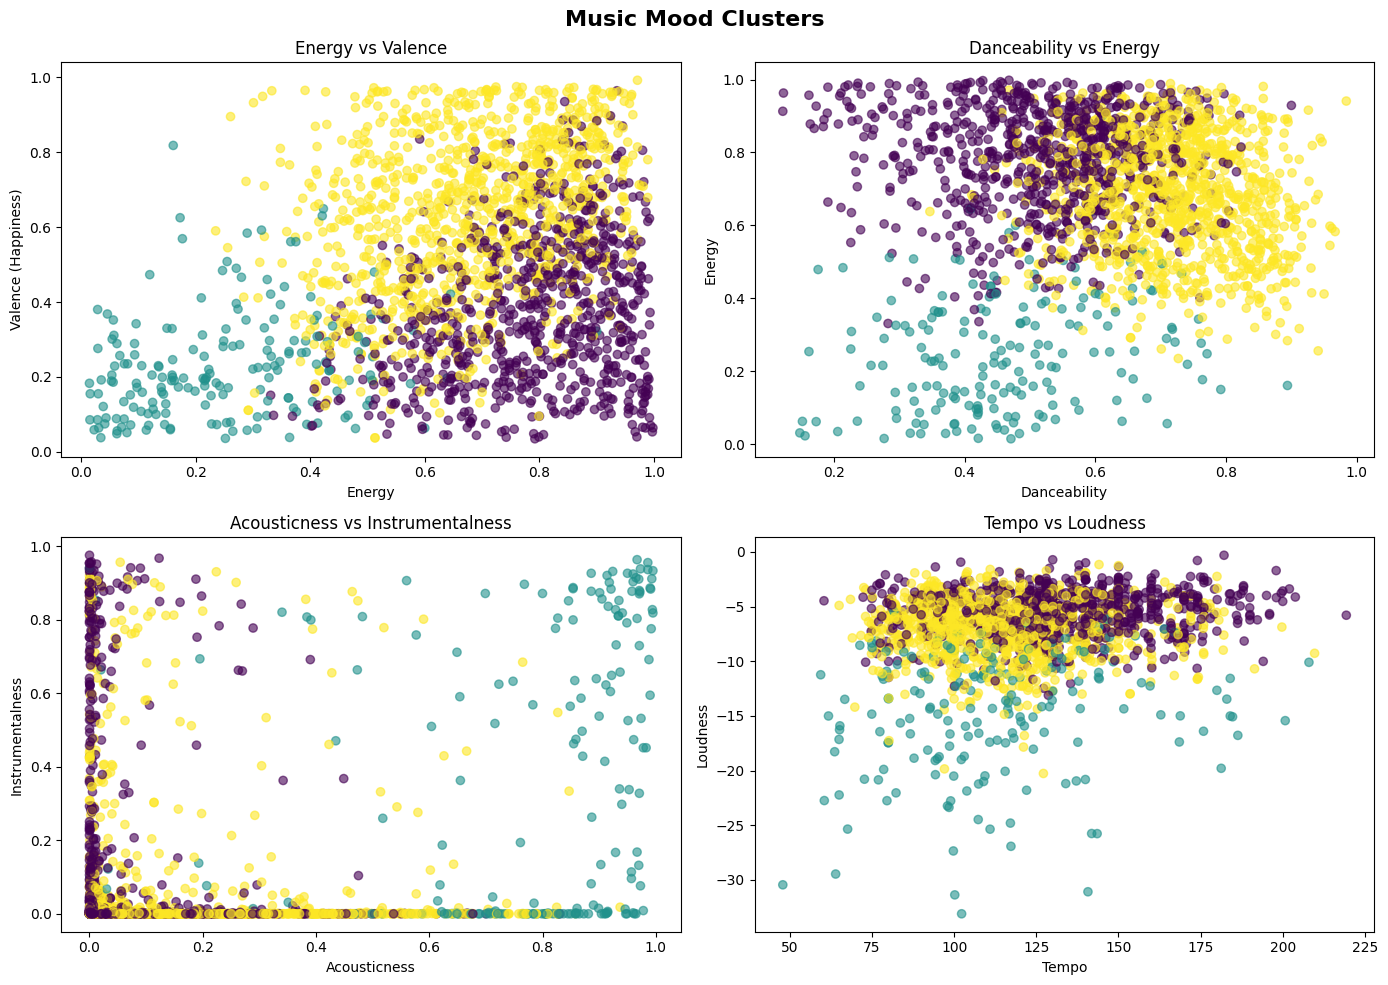

In [8]:
# Visualize clusters

# Create scatter plots for different feature pairs
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Music Mood Clusters', fontsize=16, fontweight='bold')

# Plot 1: Energy vs Valence (happiness)
axes[0, 0].scatter(df['energy'], df['valence'],
                   c=df['mood_cluster'], cmap='viridis', alpha=0.6)
axes[0, 0].set_xlabel('Energy')
axes[0, 0].set_ylabel('Valence (Happiness)')
axes[0, 0].set_title('Energy vs Valence')

# Plot 2: Danceability vs Energy
axes[0, 1].scatter(df['danceability'], df['energy'],
                   c=df['mood_cluster'], cmap='viridis', alpha=0.6)
axes[0, 1].set_xlabel('Danceability')
axes[0, 1].set_ylabel('Energy')
axes[0, 1].set_title('Danceability vs Energy')

# Plot 3: Acousticness vs Instrumentalness
axes[1, 0].scatter(df['acousticness'], df['instrumentalness'],
                   c=df['mood_cluster'], cmap='viridis', alpha=0.6)
axes[1, 0].set_xlabel('Acousticness')
axes[1, 0].set_ylabel('Instrumentalness')
axes[1, 0].set_title('Acousticness vs Instrumentalness')

# Plot 4: Tempo vs Loudness
axes[1, 1].scatter(df['tempo'], df['loudness'],
                   c=df['mood_cluster'], cmap='viridis', alpha=0.6)
axes[1, 1].set_xlabel('Tempo')
axes[1, 1].set_ylabel('Loudness')
axes[1, 1].set_title('Tempo vs Loudness')

plt.tight_layout()
plt.show()


FINDING OPTIMAL NUMBER OF CLUSTERS


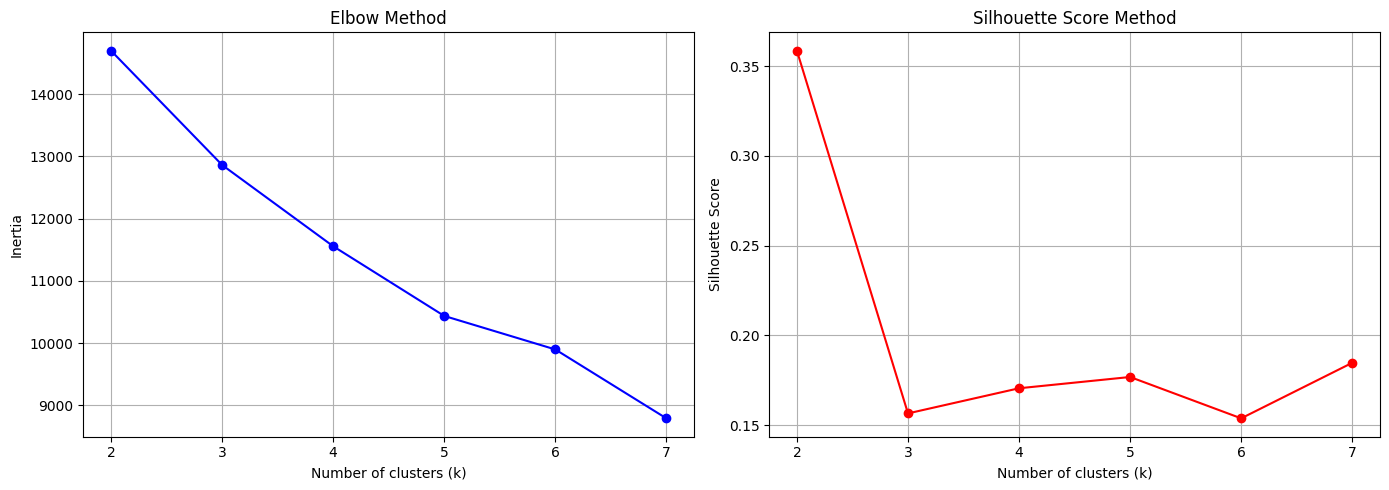


Inertia values for different k:
k=2: 14698.95
k=3: 12862.94
k=4: 11557.33
k=5: 10437.51
k=6: 9898.98
k=7: 8792.06

Silhouette scores for different k:
k=2: 0.359
k=3: 0.156
k=4: 0.171
k=5: 0.177
k=6: 0.154
k=7: 0.185


In [9]:
# Determine optimal number of clusters (optional)

print(f"\n{'='*50}")
print("FINDING OPTIMAL NUMBER OF CLUSTERS")
print(f"{'='*50}")

inertias = []
silhouette_scores = []
K_range = range(2, 8)

for k in K_range:
    km_test = KMeans(n_clusters=k, max_iter=1000, random_state=42)
    km_test.fit(X_scaled)
    inertias.append(km_test.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, km_test.labels_))

# Plot elbow curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(K_range, inertias, 'bo-')
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method')
ax1.grid(True)

ax2.plot(K_range, silhouette_scores, 'ro-')
ax2.set_xlabel('Number of clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score Method')
ax2.grid(True)

plt.tight_layout()
plt.show()

print("\nInertia values for different k:")
for k, inertia in zip(K_range, inertias):
    print(f"k={k}: {inertia:.2f}")

print("\nSilhouette scores for different k:")
for k, score in zip(K_range, silhouette_scores):
    print(f"k={k}: {score:.3f}")

In [10]:
# Save results

# Save the clustered data to a new CSV file
df.to_csv('spotify_with_clusters.csv', index=False)
print("\n✓ Results saved to 'spotify_with_clusters.csv'")

print("\n" + "="*50)
print("CLUSTERING COMPLETE!")
print("="*50)


✓ Results saved to 'spotify_with_clusters.csv'

CLUSTERING COMPLETE!
